In [1]:
import os
import warnings

import numpy as np 
import pandas as pd 
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.drop(columns='CustomerID').describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.drop(columns='CustomerID').describe(include=['O'])

,Gender
count,200
unique,2
top,Female
freq,112


In [7]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
plt.style.use('ggplot')

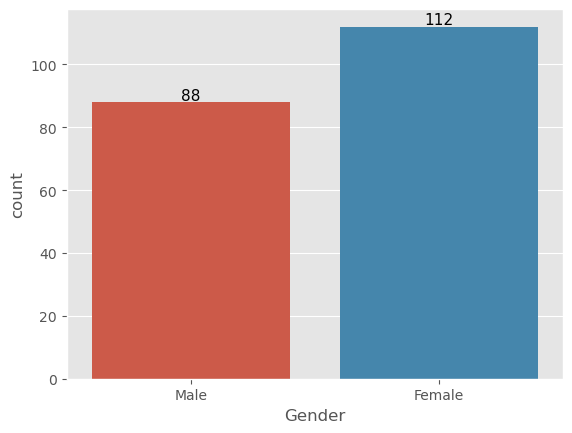

In [9]:
ax = sns.countplot(x='Gender', data=df)
for number in ax.patches:
    ax.text(number.get_x() + number.get_width() / 2, number.get_height() + 0.75, int(number.get_height()), horizontalalignment='center', fontsize = 11) 
plt.show()

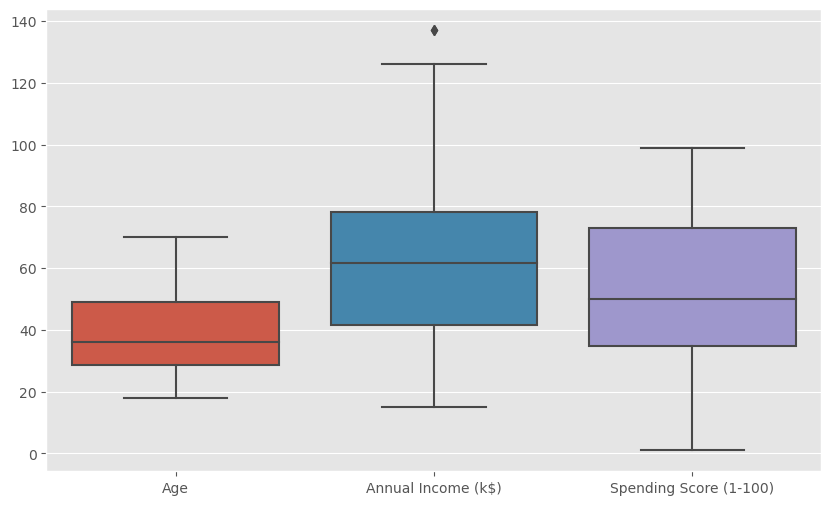

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(df.drop(columns=['CustomerID']))
plt.show()

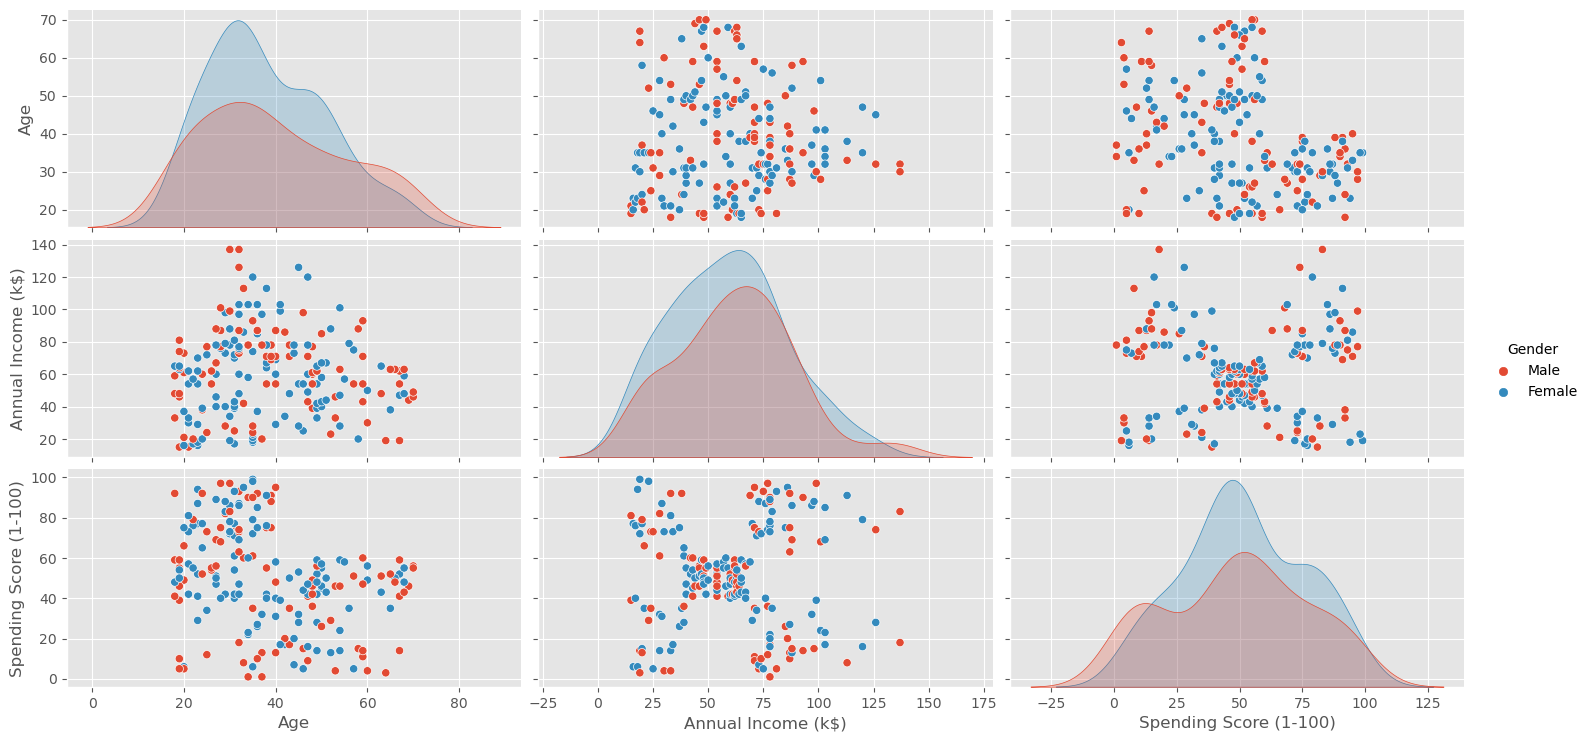

In [11]:
sns.pairplot(df.drop(columns=['CustomerID']), height=2.5, hue='Gender', aspect=2)
plt.show()

In [12]:
X= df.iloc[:, [3,4]].values

In [13]:
# wcss: within-cluster sum of sqaures
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

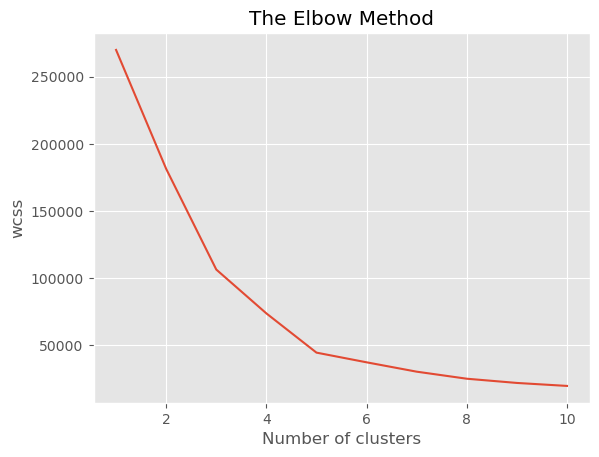

In [14]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
km_model = KMeans(n_clusters=5)
y_kmeans = km_model.fit_predict(X)

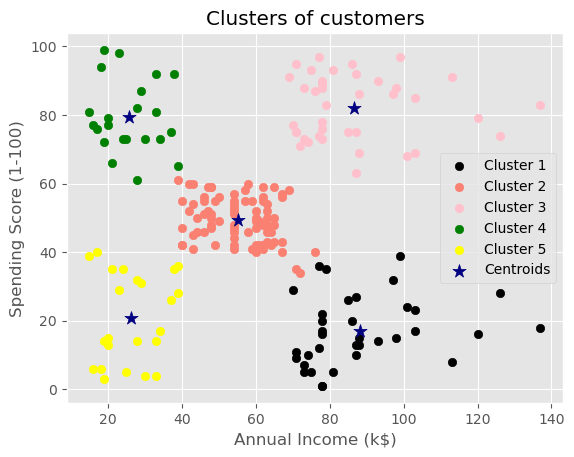

In [16]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], color='black', label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], color='salmon', label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], color='pink', label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], color='green', label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], color='yellow', label='Cluster 5')
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=100, c='navy', label='Centroids', marker='*')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()